In [1]:
import torch
import pandas as pd
from torch.optim import AdamW
from transformers import get_scheduler
import torch.nn as nn
from src.load_dataloader import initial_dataloader
from src.evaluation import evaluate
from src.evaluation import evaluate_process
from src.load_config import load_config
from src.evaluation import show_sentence
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

max_length = 128

In [6]:
baseline_model, tokenizer, device = load_config(max_length)
baseline_model.to(device)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


T5ForConditionalGeneration(
  (shared): Embedding(32128, 512)
  (encoder): T5Stack(
    (embed_tokens): Embedding(32128, 512)
    (block): ModuleList(
      (0): T5Block(
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): Linear(in_features=512, out_features=512, bias=False)
              (k): Linear(in_features=512, out_features=512, bias=False)
              (v): Linear(in_features=512, out_features=512, bias=False)
              (o): Linear(in_features=512, out_features=512, bias=False)
              (relative_attention_bias): Embedding(32, 8)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): T5LayerFF(
            (DenseReluDense): T5DenseActDense(
              (wi): Linear(in_features=512, out_features=2048, bias=False)
              (wo): Linear(in_features=2048, out_features=512, bias=False)
              (dropout): Drop

In [3]:
df = pd.read_csv('data_preprocess/datasets_combine.csv')
train_df, val_df,test_df, train_loader, val_loader, test_loader = initial_dataloader(df, tokenizer, max_length)

In [7]:
# show sentence
for i in range(5):
    show_sentence(i, test_df, tokenizer, baseline_model, device, max_length)

Original Sentence: CURTIS:How?GRUMIO:Out of their saddles into the dirt; and therebyhangs a tale
Target Sentence style: Alex Pearce scored an own goal in the 20th minute to put Cardiff ahead
Generated Sentence: scored an own goal in the 20th minute to put Cardiff ahead. Alex Pearce scored an own goal in the 20th minute to put Cardiff ahead.
Original Sentence: DUKE VINCENTIO:But shall you on your knowledge find this way?ISABELLA:I have ta'en a due and wary note upon't:With whispering and most guilty diligence,In action all of precept, he did show meThe way twice o'er
Target Sentence style: A man has been caught surfing on a couch while being towed by a car
Generated Sentence: to the written style of DUKE VINCENTIO:But shall you on your knowledge find this way?ISABELLA:I have ta'en a due and wary note upon't:With whispering and most guilty diligence,In action all of precept, he did show meThe way twice o'er to the written style of A man has been caught surfing on a couch while being towe

In [9]:
baseline_model.to(device)
predictions, labels = evaluate_process(test_df, baseline_model,tokenizer, device, max_length)

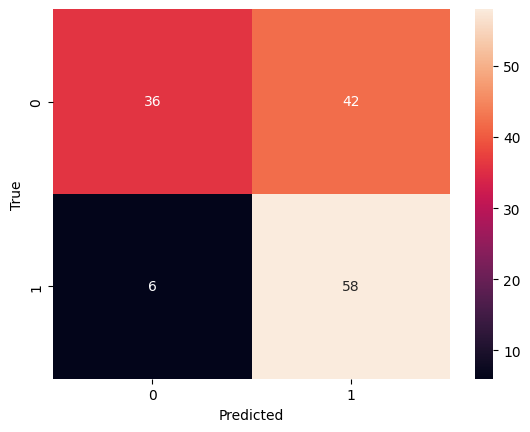

In [10]:
cm = confusion_matrix(labels, predictions)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

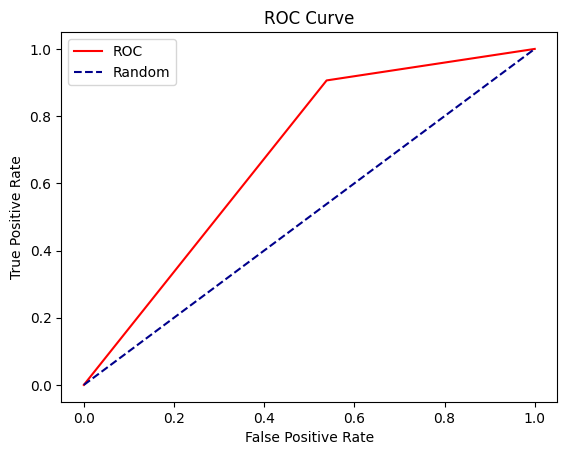

In [11]:
# plot ROC curve from confusion matrix
predict = predictions
True_label = labels
fpr, tpr, thresholds = roc_curve(True_label, predict)
auc = roc_auc_score(True_label, predict)
plt.plot(fpr, tpr, color='red', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()